In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
hr=pd.read_csv("D:\pythoncrash2\HR_comma_sep.csv")

In [29]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [30]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [31]:
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

no null values

handling categorical values

In [32]:
hr['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [33]:
hr['Department']=np.where(hr['Department']=='support','technical',hr['Department'])
hr['Department']=np.where(hr['Department']=='IT','technical',hr['Department'])

In [34]:
print(hr['Department'].unique())

['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


no. of employees who left the company

In [35]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [36]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [37]:
hr.groupby('Department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [38]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


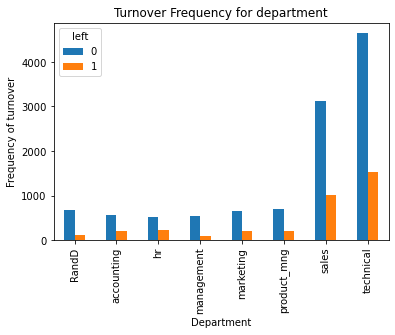

In [39]:
#matplotlib inline
pd.crosstab(hr.Department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for department')
plt.xlabel('Department')
plt.ylabel('Frequency of turnover')
plt.savefig('Department_bar_chart')

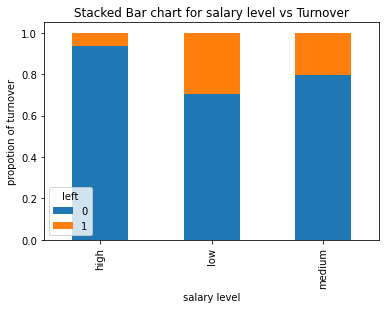

In [40]:
table=pd.crosstab(hr.salary,hr.left)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar chart for salary level vs Turnover')
plt.xlabel('salary level')
plt.ylabel('propotion of turnover')
plt.savefig('Salary_fig_chart')

In [41]:
pd.crosstab(hr.Department,hr.left)

left,0,1
Department,,
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
technical,4651,1525


In [42]:
catcols=set(hr.dtypes[hr.dtypes=='O'].index.values)

In [43]:
print(catcols)

{'salary', 'Department'}


In [44]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
x='*'
for i in catcols:
    print("LABEL Encoding of:",i)
    LE=LabelEncoder()
    print(c(hr[i]))
    hr[i]=LE.fit_transform(hr[i])
    print(c(hr[i]))
    print(x*100)

LABEL Encoding of: salary
Counter({'low': 7316, 'medium': 6446, 'high': 1237})
Counter({1: 7316, 2: 6446, 0: 1237})
****************************************************************************************************
LABEL Encoding of: Department
Counter({'technical': 6176, 'sales': 4140, 'product_mng': 902, 'marketing': 858, 'RandD': 787, 'accounting': 767, 'hr': 739, 'management': 630})
Counter({7: 6176, 6: 4140, 5: 902, 4: 858, 0: 787, 1: 767, 2: 739, 3: 630})
****************************************************************************************************


In [45]:
x=hr.drop(['left'],axis=1)
y=hr['left']
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [61]:
#train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [62]:
#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale=scaler.fit_transform(x_train)
import pickle
filename='scaler.pkl'
pickle.dump(scaler,open(filename,'wb'))
x_scale

array([[0.91208791, 0.71875   , 0.4       , ..., 0.        , 0.85714286,
        0.5       ],
       [0.50549451, 0.65625   , 0.4       , ..., 0.        , 0.42857143,
        0.        ],
       [0.67032967, 0.75      , 0.8       , ..., 0.        , 0.14285714,
        0.5       ],
       ...,
       [0.38461538, 0.3125    , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.82417582, 0.734375  , 0.2       , ..., 0.        , 0.14285714,
        0.        ],
       [0.84615385, 0.75      , 0.4       , ..., 0.        , 1.        ,
        0.5       ]])

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_scale,y_train)

RandomForestClassifier()

In [64]:
from sklearn.metrics import accuracy_score
print('Random Forest Accuracy:{:.3f}'.format(accuracy_score(y_test,rf.predict(x_test))))

Random Forest Accuracy:0.536


In [50]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold=model_selection.KFold(n_splits=10,random_state=7,shuffle=True)
modelCV=RandomForestClassifier()
scoring='accuracy'
results=model_selection.cross_val_score(modelCV,x_scale,y_train,cv=kfold,scoring=scoring)
print("10 fold cross validation average accuracy from Random Forest Classifier: %.3f" %(results.mean()))

10 fold cross validation average accuracy from Random Forest Classifier: 0.990


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.24      0.37      3417
           1       0.26      0.83      0.39      1083

    accuracy                           0.38      4500
   macro avg       0.53      0.53      0.38      4500
weighted avg       0.68      0.38      0.37      4500



In [52]:
filename='PAE_model.pkl'
pickle.dump(rf,open(filename,'wb'))